# Scale data and apply Linear, Ridge & Lasso Regression with Regularization

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data set Miles Per Gallon dataset from UCI repository
dataset=pd.read_csv(r'C:\Users\ankus\OneDrive\Desktop\Naresh IT\April\26th_April\car-mpg.csv')

In [3]:
dataset.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
dataset.shape

(398, 10)

# EDA

In [5]:
#Drop car name
#Replace origin into 1,2,3.. dont forget get_dummies
#Replace ? with nan
#Replace all nan with median
dataset=dataset.drop(['car_name'],axis=1)
dataset



,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [6]:
dataset['origin'] = dataset['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [7]:
dataset.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0


In [8]:
dataset = pd.get_dummies(dataset,columns = ['origin'])

In [9]:
dataset

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


In [11]:
dataset.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [12]:
dataset = dataset.replace('?', np.nan)
dataset

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


In [13]:
dataset = dataset.apply(lambda x: x.fillna(x.median()), axis = 0)
dataset

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


# Model building

In [14]:
# We have to predict the mpg column given the features.
X = dataset.drop(['mpg'], axis = 1) # independent variable ( Remove mpg from X data)
y = dataset[['mpg']] #dependent variable

In [22]:
X.head(2)

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,8,307.0,130,3504,12.0,70,0,1,0,0
1,8,350.0,165,3693,11.5,70,0,1,0,0


In [23]:
y.head(2)

,mpg
0,18.0
1,15.0


# Scaling the data

In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

#Scaling the data

X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns) #converting scaled data into dataframe

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns) #ideally train, test data should be in columns

In [24]:
X_s.head(2)

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968


In [25]:
y_s.head(2)

,mpg
0,-0.706439
1,-1.090751


In [26]:
from sklearn.model_selection import train_test_split


#Split into train, test set

X_train, X_test, y_train,y_test = train_test_split(X_s, y_s, test_size = 0.30, random_state = 0)
X_train.shape

(278, 10)

# Simple Linear Model

In [17]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 0.3210223856916104
The coefficient for disp is 0.32483430918483874
The coefficient for hp is -0.2291695005943761
The coefficient for wt is -0.7112101905072294
The coefficient for acc is 0.014713682764191154
The coefficient for yr is 0.3755811949510746
The coefficient for car_type is 0.38147694842331026
The coefficient for origin_america is -0.07472247547584204
The coefficient for origin_asia is 0.04451525203567791
The coefficient for origin_europe is 0.048348549539453965
The intercept is 0.019284116103639733


In [20]:
y_pred=regression_model.predict(X_test)
y_pred

array([[-0.53114626],
       [ 0.58000872],
       [-0.28618227],
       [ 0.60691934],
       [-0.10856958],
       [-0.83656974],
       [ 0.86612394],
       [ 1.48617281],
       [-0.60033432],
       [-1.58118512],
       [ 0.92691618],
       [-0.63101009],
       [-0.44775729],
       [ 0.41988537],
       [ 1.7249204 ],
       [ 0.00749374],
       [-1.62842071],
       [-0.62516288],
       [-1.82909016],
       [ 1.28766047],
       [ 0.34158378],
       [ 1.10119855],
       [-0.53530813],
       [ 0.25579947],
       [ 0.35735718],
       [ 0.91281065],
       [ 1.21245717],
       [ 1.27266567],
       [-0.92362957],
       [ 0.88592768],
       [ 0.1768598 ],
       [-1.69878378],
       [-0.23657394],
       [ 0.67791148],
       [ 0.26351164],
       [-1.21298076],
       [ 0.46743506],
       [-1.91190633],
       [ 1.09681632],
       [ 0.17397673],
       [ 0.15780247],
       [ 0.20951487],
       [-0.1588762 ],
       [ 1.3451445 ],
       [ 0.00410714],
       [-0

# Regularized Lasso (L1)  Regression

In [19]:
from sklearn.linear_model import Lasso
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

print('Lasso model coef: {}'.format(lasso_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here  

Lasso model coef: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


# Regularized Ridge(L2) Regression

In [18]:
from sklearn.linear_model import Ridge, Lasso
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(X_train, y_train)

print('Ridge model coef: {}'.format(ridge_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here  

Ridge model coef: [[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
   0.37725608 -0.07423624  0.04441039  0.04784031]]


# Score Comparison

In [21]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 


#Simple Linear Model
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

print('*************************')
#Lasso
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.8343770256960538
0.8513421387780066
*************************
0.8343617931312617
0.8518882171608505
*************************
0.7938010766228453
0.8375229615977084


# Model Parameter Tuning
* r^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable.
* Instead we use adjusted r^2 which removes the statistical chance that improves r^2 (adjusted r^2 = r^2 - fluke)

* Scikit does not provide a facility for adjusted r^2... so we use statsmodel, a library that gives results similar to what you obtain in R language
* This library expects the X and Y to be given in one single dataframe

In [27]:
data_train_test = pd.concat([X_train, y_train], axis =1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
230,1.498191,1.503514,1.720935,1.412400,-1.513346,0.268063,-1.062235,0.773559,-0.497643,-0.461968,-1.026699
357,-0.856321,-0.714680,-0.112746,-0.420234,-0.278877,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.202311
140,1.498191,1.061796,1.197027,1.521175,-0.024722,-0.544290,-1.062235,0.773559,-0.497643,-0.461968,-1.218855
22,-0.856321,-0.858718,-0.243723,-0.703997,0.701436,-1.627426,0.941412,-1.292726,-0.497643,2.164651,0.190289
250,1.498191,1.196232,0.935072,0.903991,-0.859804,0.538847,-1.062235,0.773559,-0.497643,-0.461968,-0.527093


In [28]:
X.head(1)

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,8,307.0,130,3504,12.0,70,0,1,0,0


In [40]:
y.head(1)

,mpg
0,18.0


In [44]:
import statsmodels.formula.api as smf

ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia',
              data = data_train_test).fit()
ols1.params


Intercept        -0.019500
cyl               0.247445
disp              0.288382
hp               -0.189903
wt               -0.673223
acc               0.067545
yr                0.344636
car_type          0.314915
origin_america   -0.076829
origin_europe     0.031283
origin_asia       0.063360
dtype: float64

In [46]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     152.0
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          7.34e-100
Time:                        15:14:55   Log-Likelihood:                -139.91
No. Observations:                 278   AIC:                             299.8
Df Residuals:                     268   BIC:                             336.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0195      0.025     -0.

In [47]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(X_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.3861322745251847


<AxesSubplot:xlabel='acc', ylabel='mpg'>

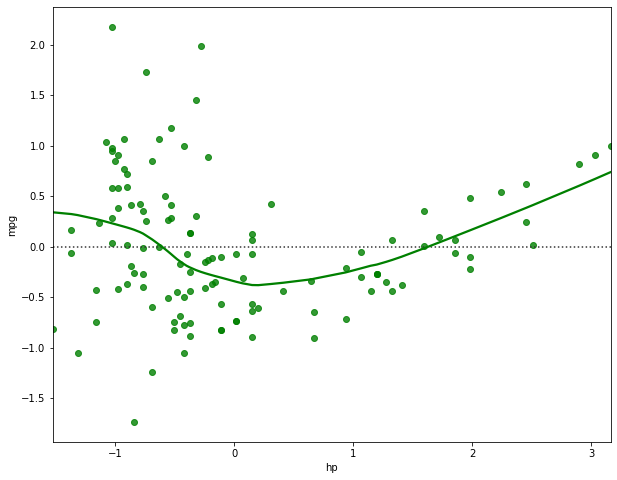

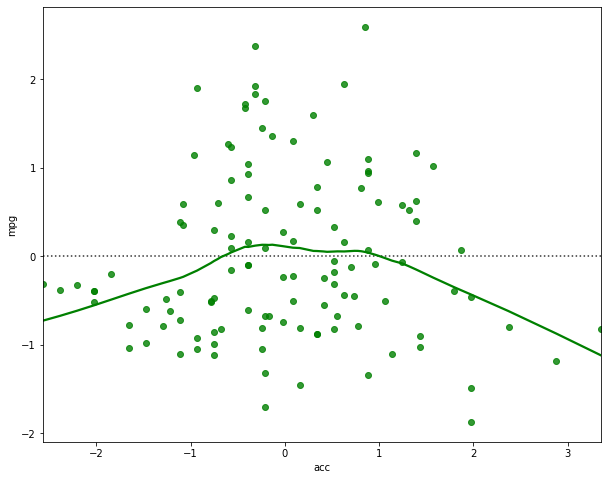

In [49]:
#So there is an avg. mpg difference of 0.37 from real mpg

# Is OLS a good model ? Lets check the residuals for some of these predictor.

import seaborn as sns
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )

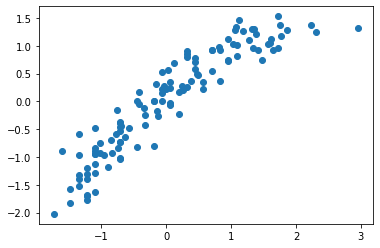

In [50]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mpg'], y_pred)